# **anatomical brain extraction.**
You should clean up the brains by hand.
The output will save in a anat folder inside each subject folder. These anatomical data will be used to create a template for the rest of analysis.

In [2]:
import os
import glob
data_path = '/mnt/d/Data/Pigeon/analysis/ColorDisc/'
anat_dirs = glob.glob('%s/sub*/acquisition/anat.nii.gz'%(data_path))
 
for curr_anat in anat_dirs:
    curr_anat_dir = os.path.dirname(curr_anat)
    print(curr_anat_dir)

    # creat anatomical directory for each subject, based on acquisition anatomy data
    os.system("mkdir %s/anat"%(curr_anat_dir[:-12]))
    os.system("cp %s %s/anat"%(curr_anat,curr_anat_dir[:-12]))

    # bet call edit to use the flags you found worked well on your data
    os.system("bet %s %s/anat/anat_brain -R -f 0.3 -g 0 -c 0 0 0 -m -t"%(curr_anat,curr_anat_dir[:-12]))

   

/mnt/d/Data/Pigeon/analysis/ColorDisc/sub01/acquisition
/mnt/d/Data/Pigeon/analysis/ColorDisc/sub02/acquisition
/mnt/d/Data/Pigeon/analysis/ColorDisc/sub03/acquisition
/mnt/d/Data/Pigeon/analysis/ColorDisc/sub04/acquisition
/mnt/d/Data/Pigeon/analysis/ColorDisc/sub05/acquisition
/mnt/d/Data/Pigeon/analysis/ColorDisc/sub06/acquisition
/mnt/d/Data/Pigeon/analysis/ColorDisc/sub07/acquisition
/mnt/d/Data/Pigeon/analysis/ColorDisc/sub08/acquisition


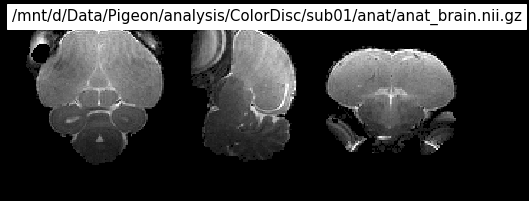

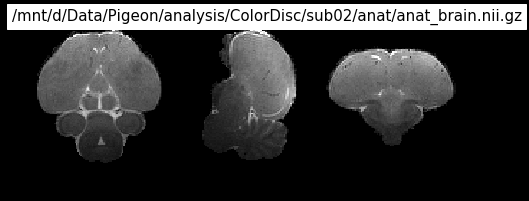

In [16]:
from nilearn.plotting import plot_anat
%matplotlib inline
import matplotlib.pyplot as plt
import os
import glob
data_path = '/mnt/d/Data/Pigeon/analysis/ColorDisc/'
subdirs = glob.glob('%s/sub*/anat/anat_brain.nii.gz'%(data_path))
for dir in subdirs:
    plot_anat(dir, title=dir, cut_coords = (20,20,10),
             display_mode='ortho', dim=-1, draw_cross=False, annotate=False)


# clean the brain mask by hand.
you should clean the masks manually. 


# apply cleaned masks anatomical data


In [19]:
# apply cleaned mask on anatimical data
import os
import glob

data_path = '/mnt/d/Data/Pigeon/analysis/ColorDisc/'
anat_dirs = glob.glob('%s/sub*/anat/anat.nii.gz'%(data_path))
 
for curr_anat in anat_dirs:
    print(curr_anat)
    # Only run the following if your orientation was mixed up
    # BUT directional labels must be accurate in fslview
    # Make sure you verify that it worked
    #os.system("fslreorient2std  %s/anatomy/highres001  %s/anatomy/highres001"%(dir,dir))
    # bet call edit to use the flags you found worked well on your data
    os.system("fslmaths %s -mul %s/anat_brain_mask %s/anat_brain"%(curr_anat,os.path.dirname(curr_anat),os.path.dirname(curr_anat)))

/mnt/d/Data/Pigeon/analysis/ColorDisc/sub01/anat/anat.nii.gz
/mnt/d/Data/Pigeon/analysis/ColorDisc/sub02/anat/anat.nii.gz


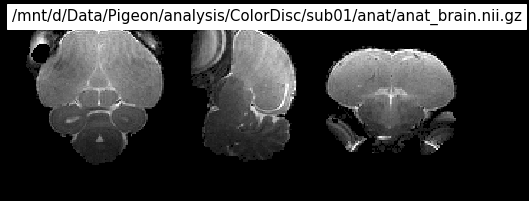

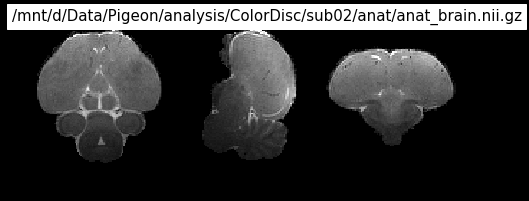

In [18]:
from nilearn.plotting import plot_anat
%matplotlib inline
import matplotlib.pyplot as plt
import os
import glob
data_path = '/mnt/d/Data/Pigeon/analysis/ColorDisc/'
subdirs = glob.glob('%s/sub*/anat/anat_brain.nii.gz'%(data_path))
for dir in subdirs:
    plot_anat(dir, title=dir, cut_coords = (20,20,10),
             display_mode='ortho', dim=-1, draw_cross=False, annotate=False)